<a href="https://colab.research.google.com/github/FariusGitHub/DataScience/blob/master/ratehub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

term year =  1 scanning completed
term year =  2 scanning completed
term year =  3 scanning completed
term year =  4 scanning completed
term year =  5 scanning completed


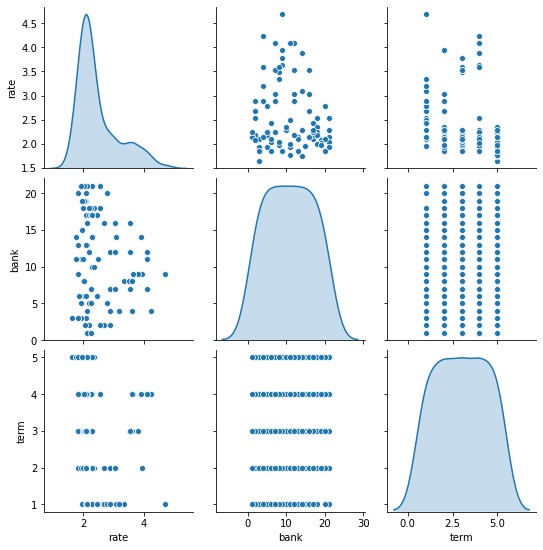

In [ ]:
import requests
import bs4
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

term = 'https://www.ratehub.ca/best-mortgage-rates/{}-year/fixed'
#DEVELOPING ARRAY OF MORTGAGE RATE, BANK NAME AND TERM YEAR
termsandbank=[]
for x in range(1,6):
    soup = bs4.BeautifulSoup(requests.get(term.format(x)).text,"lxml")
    for y in range(int(len(soup.select('.rh-provider'))/2)):
        termsandbank.append([soup.select('.rh-rate')[y].\
                             text.split()[0].split('%')[0],
                           'CANWISE' if soup.select('.rh-provider')[y].\
                           text.split()[0] == 'CanWise'
                               else ' '.join(soup.select('.rh-provider')[y].\
                                             text.upper().split()),x 
                            ])
    print('term year = ',x, 'scanning completed')

#DEVELOPING BANK CODES    

banksorts=[]
bankcodes=[]
bankdicts={}

for a1,a2,a3 in termsandbank:
    if a2 not in banksorts:
        banksorts.append(a2.upper())  

banksorts.sort()
banksorts

for c in range(len(banksorts)):
    bankcodes.append((banksorts[c], c+1))
    c+=1
    
for k, v in bankcodes:
    bankdicts[k] = v

# CODED ratesandbank with added year term behind
for z in range(len(termsandbank)):
        termsandbank[z][1] = bankdicts.get(termsandbank[z][1],"")

# print(termsandbank)
        
# # #PRACTICES WITH NUMPY,PANDA, SEABORN AND PYPLOT
data=np.array(termsandbank, dtype='float')
df = pd.DataFrame(data, columns=["rate", "bank", "term"])
sns.pairplot(df, diag_kind='kde', kind='scatter')